In [32]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import PIL
from tqdm import tqdm

from typing import Callable, Optional, Tuple, Union
from dataset_tool import open_dataset, make_transform, is_image_ext, maybe_min

In [2]:
PIL.Image.init()

1

In [3]:
filepath = 'DECIMER_HDM_Dataset_Images.zip'

In [4]:
os.path.exists(filepath)

True

In [26]:
with zipfile.ZipFile(filepath, mode='r') as z:
    input_images = [str(f) for f in sorted(z.namelist()) if is_image_ext(f)]

In [27]:
input_images

['DECIMER_HDM_Dataset_Images/CDK_Depict_10_1.png',
 'DECIMER_HDM_Dataset_Images/CDK_Depict_10_10.png',
 'DECIMER_HDM_Dataset_Images/CDK_Depict_10_100.png',
 'DECIMER_HDM_Dataset_Images/CDK_Depict_10_101.png',
 'DECIMER_HDM_Dataset_Images/CDK_Depict_10_103.png',
 'DECIMER_HDM_Dataset_Images/CDK_Depict_10_104.png',
 'DECIMER_HDM_Dataset_Images/CDK_Depict_10_105.png',
 'DECIMER_HDM_Dataset_Images/CDK_Depict_10_11.png',
 'DECIMER_HDM_Dataset_Images/CDK_Depict_10_12.png',
 'DECIMER_HDM_Dataset_Images/CDK_Depict_10_13.png',
 'DECIMER_HDM_Dataset_Images/CDK_Depict_10_14.png',
 'DECIMER_HDM_Dataset_Images/CDK_Depict_10_15.png',
 'DECIMER_HDM_Dataset_Images/CDK_Depict_10_17.png',
 'DECIMER_HDM_Dataset_Images/CDK_Depict_10_18.png',
 'DECIMER_HDM_Dataset_Images/CDK_Depict_10_19.png',
 'DECIMER_HDM_Dataset_Images/CDK_Depict_10_2.png',
 'DECIMER_HDM_Dataset_Images/CDK_Depict_10_20.png',
 'DECIMER_HDM_Dataset_Images/CDK_Depict_10_21.png',
 'DECIMER_HDM_Dataset_Images/CDK_Depict_10_22.png',
 'DECIMER

In [33]:
def open_image_zip(source, *, max_images: Optional[int]):
    with zipfile.ZipFile(source, mode='r') as z:
        input_images = [str(f) for f in sorted(z.namelist()) if is_image_ext(f)]

        # Load labels.
        labels = {}
        if 'dataset.json' in z.namelist():
            with z.open('dataset.json', 'r') as file:
                labels = json.load(file)['labels']
                if labels is not None:
                    labels = { x[0]: x[1] for x in labels }
                else:
                    labels = {}

    max_idx = maybe_min(len(input_images), max_images)

    def iterate_images():
        with zipfile.ZipFile(source, mode='r') as z:
            for idx, fname in enumerate(input_images):
                with z.open(fname, 'r') as file:
                    img = PIL.Image.open(file).convert("L")
                    img = np.array(img)
                yield dict(img=img, label=labels.get(fname))
                if idx >= max_idx-1:
                    break
    return max_idx, iterate_images()

In [34]:
num_files, input_iter = open_image_zip(filepath, max_images=None)

In [5]:
num_files, input_iter = open_dataset(filepath, max_images=None)

In [35]:
image = next(input_iter)

In [36]:
print(f"vmax: {image['img'].max()}")
print(f"vmin: {image['img'].min()}")
print(f"shape: {image['img'].shape}")

vmax: 251
vmin: 0
shape: (490, 617)


In [37]:
image['img']

array([[251, 251, 251, ..., 251, 251, 251],
       [251, 251, 251, ..., 251, 251, 251],
       [251, 251, 251, ..., 251, 251, 251],
       ...,
       [251, 251, 251, ..., 251, 251, 251],
       [251, 251, 251, ..., 251, 251, 251],
       [251, 251, 251, ..., 251, 251, 251]], dtype=uint8)

In [38]:
transform_image = make_transform(None, 256, 256, 'lanczos')

In [39]:
img = transform_image(image['img'])

In [40]:
print(f'vmax: {img.max()}')
print(f'vmin: {img.min()}')
print(f'shape: {img.shape}')

vmax: 255
vmin: 3
shape: (256, 256)


In [41]:
img

array([[251, 251, 251, ..., 251, 251, 251],
       [251, 251, 251, ..., 251, 251, 251],
       [251, 251, 251, ..., 251, 251, 251],
       ...,
       [251, 251, 251, ..., 251, 251, 251],
       [251, 251, 251, ..., 251, 251, 251],
       [251, 251, 251, ..., 251, 251, 251]], dtype=uint8)

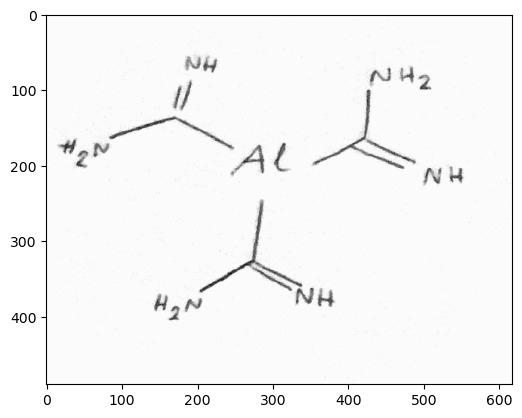

In [45]:
plt.imshow(255-image['img'], vmin=0, vmax=255, cmap='gray_r')

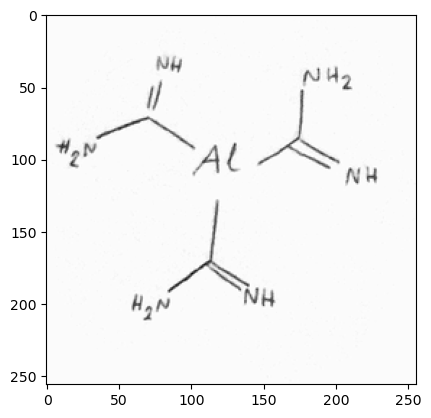

In [47]:
plt.imshow(255-img, vmin=0, vmax=255, cmap='gray_r')